In [1]:
! pip install yfinance
! pip install pandas-datareader

     |████████████████████████████████| 6.4 MB 12.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start = '2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100

In [ ]:
sec_dpc.iloc[0] = 0
msft_dpc.iloc[0] = 0

In [ ]:
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

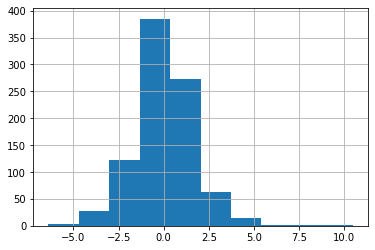

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sec_dpc)
plt.grid(True)
plt.show()

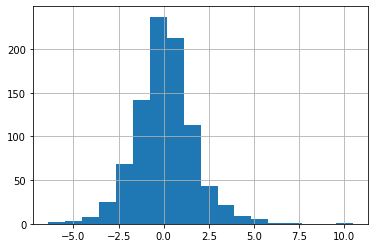

In [ ]:
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [ ]:
sec_dpc.describe()

count    893.000000
mean       0.059386
std        1.663553
min       -6.387665
25%       -0.963597
50%        0.000000
75%        0.986193
max       10.470588
Name: Close, dtype: float64

In [ ]:
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100 - 100

In [ ]:
sec_dpc_cp

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.926782
2018-05-10    -0.578035
2018-05-11    -1.156069
                ...    
2021-12-13    47.976879
2021-12-14    48.362235
2021-12-15    49.518304
2021-12-16    49.903661
2021-12-17    50.289017
Name: Close, Length: 893, dtype: float64

In [ ]:
sec_dpc

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 893, dtype: float64

In [ ]:
sec['Close'].head()

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
Name: Close, dtype: float64

In [ ]:
(51300-51900)/51900

-0.011560693641618497

In [ ]:
1.05 * 1.1 * 0.9

1.0395000000000003

In [ ]:
(103.95-100)/100

0.03950000000000003

In [ ]:
msft_dpc_cp = ((100+msft_dpc)/100).cumprod()*100-100

In [ ]:
msft_dpc_cp

Date
2018-05-04      0.000000
2018-05-07      1.113911
2018-05-08      0.683054
2018-05-09      1.870532
2018-05-10      2.889870
                 ...    
2021-12-13    256.662443
2021-12-14    245.039916
2021-12-15    251.670850
2021-12-16    241.424949
2021-12-17    240.268995
Name: Close, Length: 914, dtype: float64

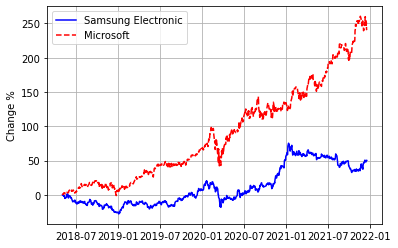

In [ ]:
plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronic')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


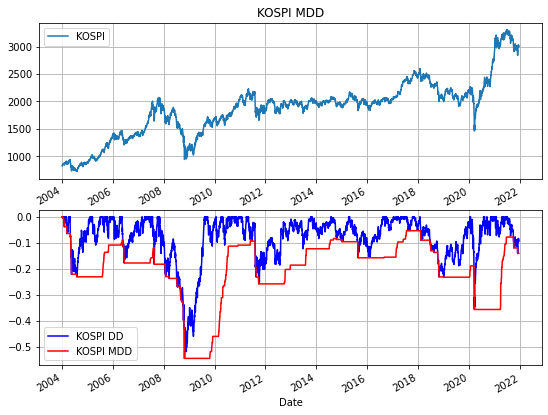

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252 # 산정 기간에 해당하는, 1년 동안의 개장일을 252일로 어림잡이 설정
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)

plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend = True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend = True)
plt.show()

In [4]:
import pandas as pd
import numpy as np

In [ ]:
peak

Date
2004-01-05     824.099976
2004-01-06     824.099976
2004-01-07     827.070007
2004-01-08     827.070007
2004-01-09     845.270020
                 ...     
2021-12-13    3305.209961
2021-12-14    3305.209961
2021-12-15    3305.209961
2021-12-16    3305.209961
2021-12-17    3305.209961
Name: Adj Close, Length: 4440, dtype: float64

In [ ]:
kospi['peak'] = peak

In [ ]:
kospi[['Adj Close', 'peak']].head(20)

,Adj Close,peak
Date,,
2004-01-05,824.099976,824.099976
2004-01-06,823.429993,824.099976
2004-01-07,827.070007,827.070007
2004-01-08,824.150024,827.070007
2004-01-09,845.270020,845.270020
2004-01-12,850.789978,850.789978
2004-01-13,848.429993,850.789978
2004-01-14,849.619995,850.789978
2004-01-15,845.659973,850.789978


In [ ]:
max_dd.min()

-0.5453665130144085

In [ ]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

In [ ]:
kospi['drawdown']=drawdown
kospi.iloc[1170:1200]

,Open,High,Low,Close,Adj Close,Volume,peak,drawdown
Date,,,,,,,,
2008-09-25,1487.729980,1503.829956,1469.229980,1501.630005,1501.630005,419100,2064.850098,-0.272766
2008-09-26,1492.420044,1498.739990,1469.829956,1476.329956,1476.329956,405900,2064.850098,-0.285018
2008-09-29,1491.109985,1496.300049,1449.329956,1456.359985,1456.359985,365900,2064.850098,-0.294690
2008-09-30,1383.969971,1448.060059,1376.719971,1448.060059,1448.060059,412800,2064.850098,-0.298709
2008-10-01,1453.400024,1453.400024,1429.569946,1439.670044,1439.670044,314200,2064.850098,-0.302773
2008-10-02,1450.160034,1458.680054,1410.349976,1419.650024,1419.650024,317900,2064.850098,-0.312468
2008-10-06,1389.680054,1389.680054,1351.719971,1358.750000,1358.750000,312400,2064.850098,-0.341962
2008-10-07,1340.920044,1371.239990,1321.810059,1366.099976,1366.099976,349600,2064.850098,-0.338402
2008-10-08,1323.959961,1334.339966,1281.469971,1286.689941,1286.689941,431500,2064.850098,-0.376860


In [5]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
nikkei = pdr.get_data_yahoo('^N225', '2000-01-04')

[*********************100%***********************]  1 of 1 completed


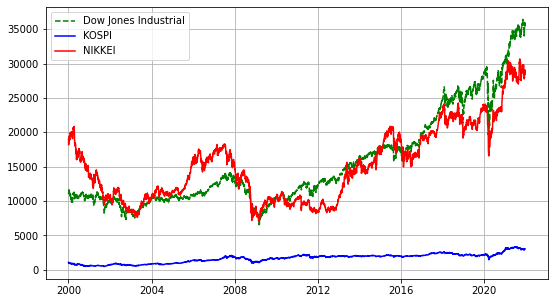

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'g--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.plot(nikkei.index, nikkei.Close, 'r', label='NIKKEI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [6]:
d = (dow.Close / dow.Close.loc['2000-01-04'])*100
k = (kospi.Close / kospi.Close.loc['2000-01-04'])*100

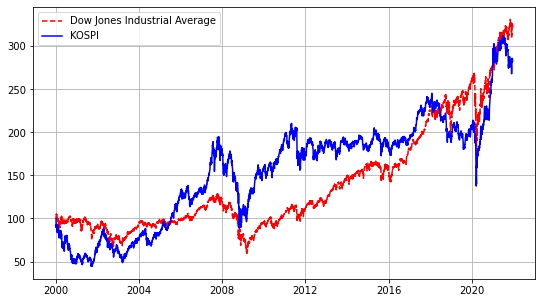

In [7]:
plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [13]:
dow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
2000-01-10,11532.480469,11638.280273,11532.480469,11572.200195,11572.200195,168180000
...,...,...,...,...,...,...
2021-12-13,35958.929688,35958.929688,35609.531250,35650.949219,35650.949219,441110000
2021-12-14,35605.730469,35779.468750,35441.738281,35544.179688,35544.179688,440900000
2021-12-15,35549.351562,35943.839844,35389.300781,35927.429688,35927.429688,424720000


In [16]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5693 entries, 2000-01-04 to 2021-12-17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DOW     5526 non-null   float64
 1   KOSPI   5419 non-null   float64
dtypes: float64(2)
memory usage: 133.4 KB


In [28]:
df = df.fillna(method='bfill')

In [30]:
df.isnull().sum().sum()

0

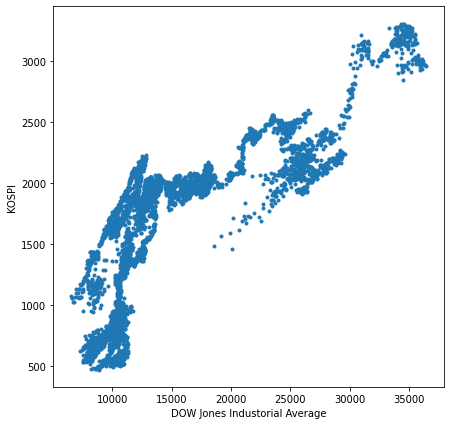

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('DOW Jones Industorial Average')
plt.ylabel('KOSPI')
plt.show()

In [32]:
from scipy import stats

In [35]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07756845046036892, intercept=449.1070950121125, rvalue=0.8176631624331052, pvalue=0.0, stderr=0.0007239528843671339)

In [36]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.817663
KOSPI,0.817663,1.000000


In [38]:
r_value = (df['DOW'].corr(df['KOSPI']))**2
r_value

0.668573047200106

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


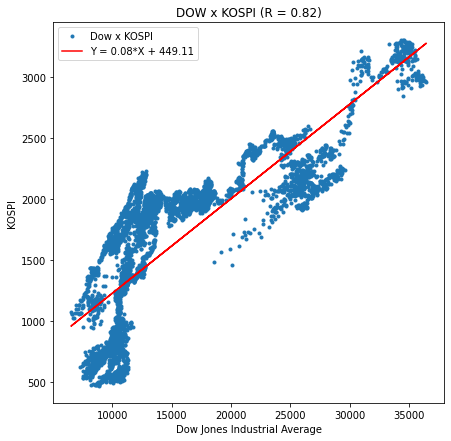

In [14]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
df = df.fillna(method='bfill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope*df.X + regr.intercept, 'r')
plt.legend(['Dow x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

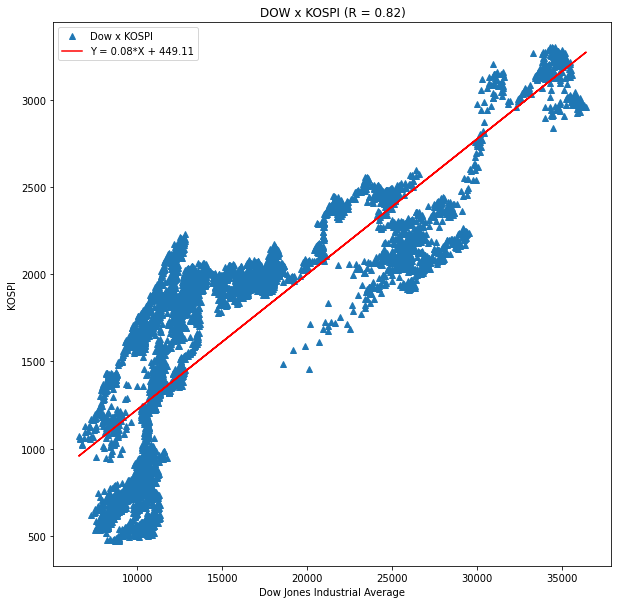

In [17]:
plt.figure(figsize=(10,10))
plt.plot(df.X, df.Y, '^')
plt.plot(df.X, regr.slope*df.X + regr.intercept, 'r')
plt.legend(['Dow x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()